In [1]:
import pandas as pd
from pytrends.request import TrendReq
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
pytrends = TrendReq(hl='en-US', tz=360)  
keyword = "Artifical Intelligence"

Data Request

In [3]:
pytrends.build_payload([keyword], cat=0, timeframe='today 12-m', geo='', gprop='')

Country-wise Interest

In [4]:
region_data = pytrends.interest_by_region()
region_data = region_data.sort_values(by=keyword, ascending=False).head(10)

Bar plot for top country

C:\Users\CS3006TX\AppData\Local\Temp\ipykernel_26684\1548046019.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_data[keyword], y=region_data.index, palette='Blues_d')


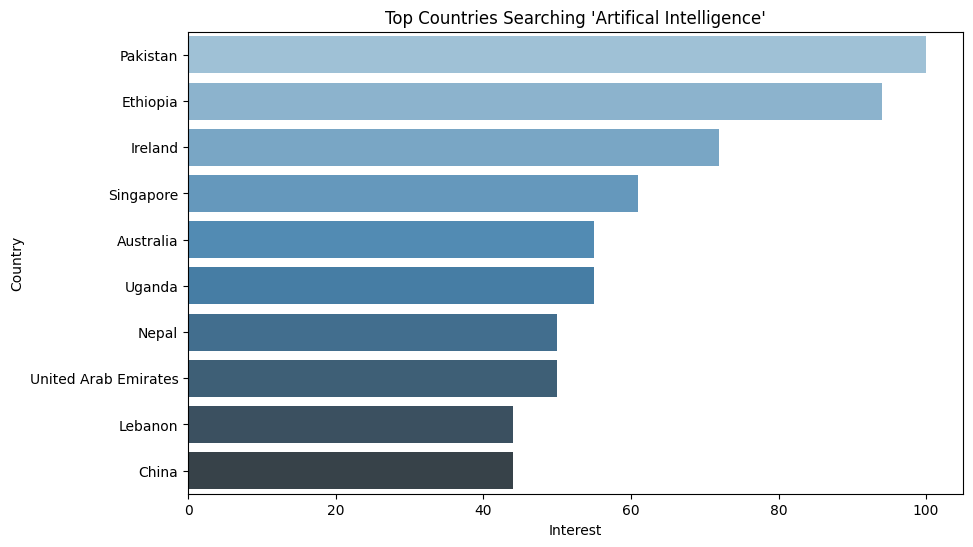

In [5]:
plt.figure(figsize=(10,6))
sns.barplot(x=region_data[keyword], y=region_data.index, palette='Blues_d')
plt.title(f"Top Countries Searching '{keyword}'")
plt.xlabel("Interest")
plt.ylabel("Country")
plt.show()

world map plot using choropleth

C:\Users\CS3006TX\AppData\Local\Temp\ipykernel_26684\3523161595.py:2: DeprecationWarning: The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.
  fig = px.choropleth(region_data,


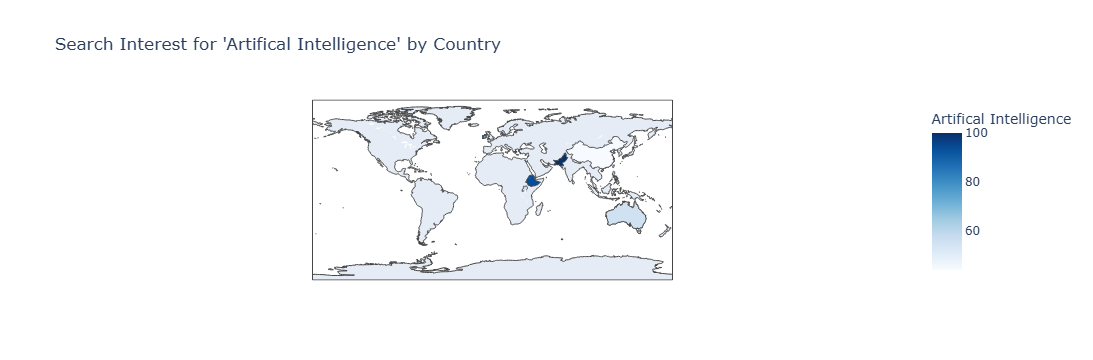

In [6]:
region_data = region_data.reset_index()
fig = px.choropleth(region_data,
locations='geoName',
locationmode='country names',
color=keyword,
title=f"Search Interest for '{keyword}' by Country",
color_continuous_scale='Blues')
fig.show()

In [7]:
time_df = pytrends.interest_over_time()

C:\Users\CS3006TX\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytrends\request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



Line Plot (Search Trend Over Time)

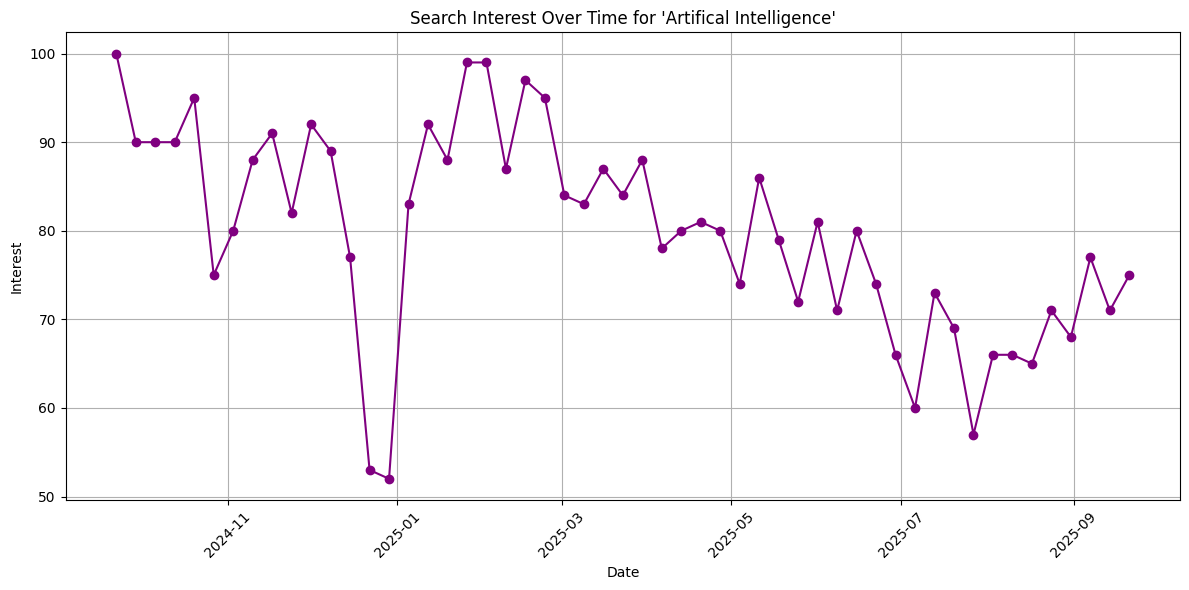

In [8]:
plt.figure (figsize=(12,6))
plt.plot(time_df.index, time_df[keyword], marker='o', color='purple')
plt.title(f"Search Interest Over Time for '{keyword}'") 
plt.xlabel("Date")
plt.ylabel("Interest")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Compare Multiple Keywords

In [9]:
kw_list = ["cloud computing", "data science" , "machine learning"]
pytrends.build_payload(kw_list, cat=0, timeframe='today 12-m', geo='', gprop='')

C:\Users\CS3006TX\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytrends\request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



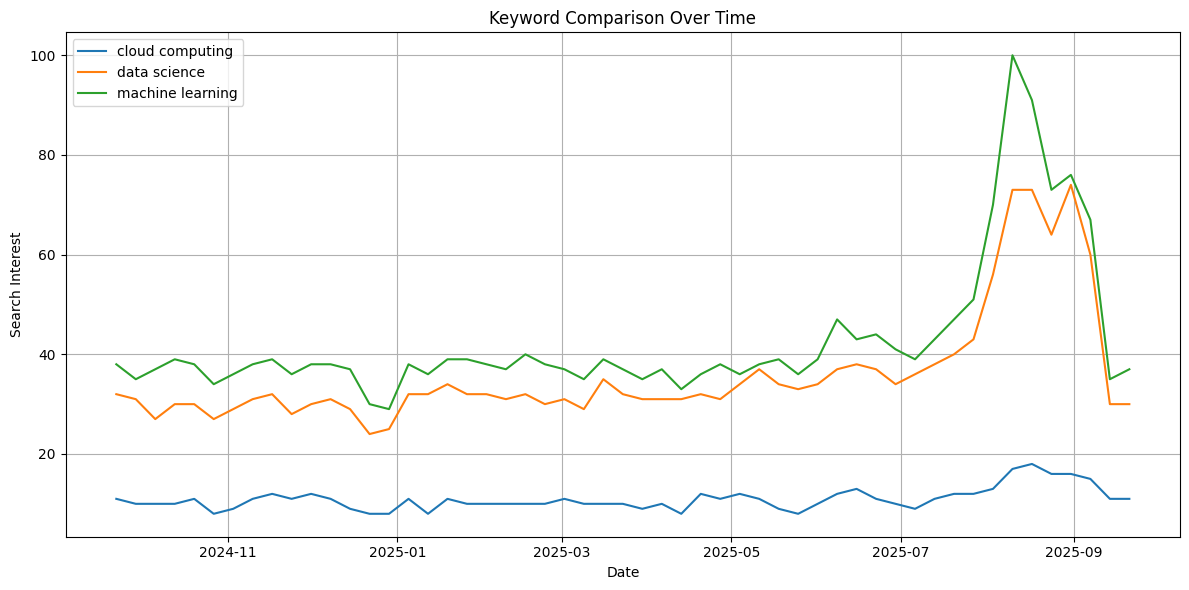

In [10]:
compare_df = pytrends.interest_over_time()
plt.figure(figsize= (12,6))
for kw in kw_list:
    plt.plot(compare_df.index, compare_df [kw], label=kw)
plt.title("Keyword Comparison Over Time") 
plt.xlabel("Date" )
plt.ylabel("Search Interest")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()